In [1]:
import ast
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
plt.style.use('seaborn')
sns.set_style('whitegrid')
sns.set_context("paper")

In [3]:
import pandas as pd
df = pd.read_csv('compare_sgp_and_fcsgp_kld.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df

,image,rel_kldsFCSGP,rel_kldsSGP,execution_timeFCSGP,execution_timeSGP,num_itersFCSGP,num_itersSGP
0,ccfbue110099.fits,"[0.15634477045763842, 0.00019011775074820837, ...","[0.22670202288995567, 0.0464635489112298, 2.73...",0.012788,0.008658,3,3
1,ccfbvc170118.fits,"[0.08007758479694331, 0.003037019057202272, 6....","[0.18903644957539092, 0.05058746873552292, 0.0...",0.007652,0.010460,3,4
2,ccfbvc170118.fits,"[0.08604338291383358, 0.0018018105101716576, 2...","[0.19289946362482005, 0.05873735334502428, 0.0...",0.007700,0.010544,3,5
3,ccfbvc170118.fits,"[0.08894840876865016, 0.0023281790198920716, 2...","[0.1625470337160251, 0.033507493336538345, 1.2...",0.007676,0.008941,3,3
4,ccfbvc170119.fits,"[0.04893809127321742, 0.0003606065082920068, 0.0]","[0.1645857412622922, 0.01894675947536451, 0.00...",0.011551,0.009342,3,4
5,ccfbvc170119.fits,"[0.08026263792816644, 2.5965690073190985e-15]","[0.22252456765530138, 0.02928306577523426, 0.0...",0.006097,0.011840,2,5
6,ccfbvc170119.fits,"[0.08190492902143579, 0.0]","[0.19387811703558164, 0.042349999598087495, 0....",0.006060,0.011155,2,5
7,ccfbvc170120.fits,"[0.07792561384538257, 0.013538662946226132, 1....","[0.10049845961519514, 0.043922786461012206, 0....",0.007766,0.014610,3,5
8,ccfbvc170120.fits,"[0.04745118029172015, 0.0016049956019242278, 6...","[0.3278840182738298, 0.041633664383454935, 0.0...",0.007733,0.013016,3,6
9,ccfbvc170121.fits,"[0.03610456986986957, 0.00135307149247566, 6.8...","[0.2942888831964358, 0.020338643921181565, 0.0...",0.007994,0.009964,3,4


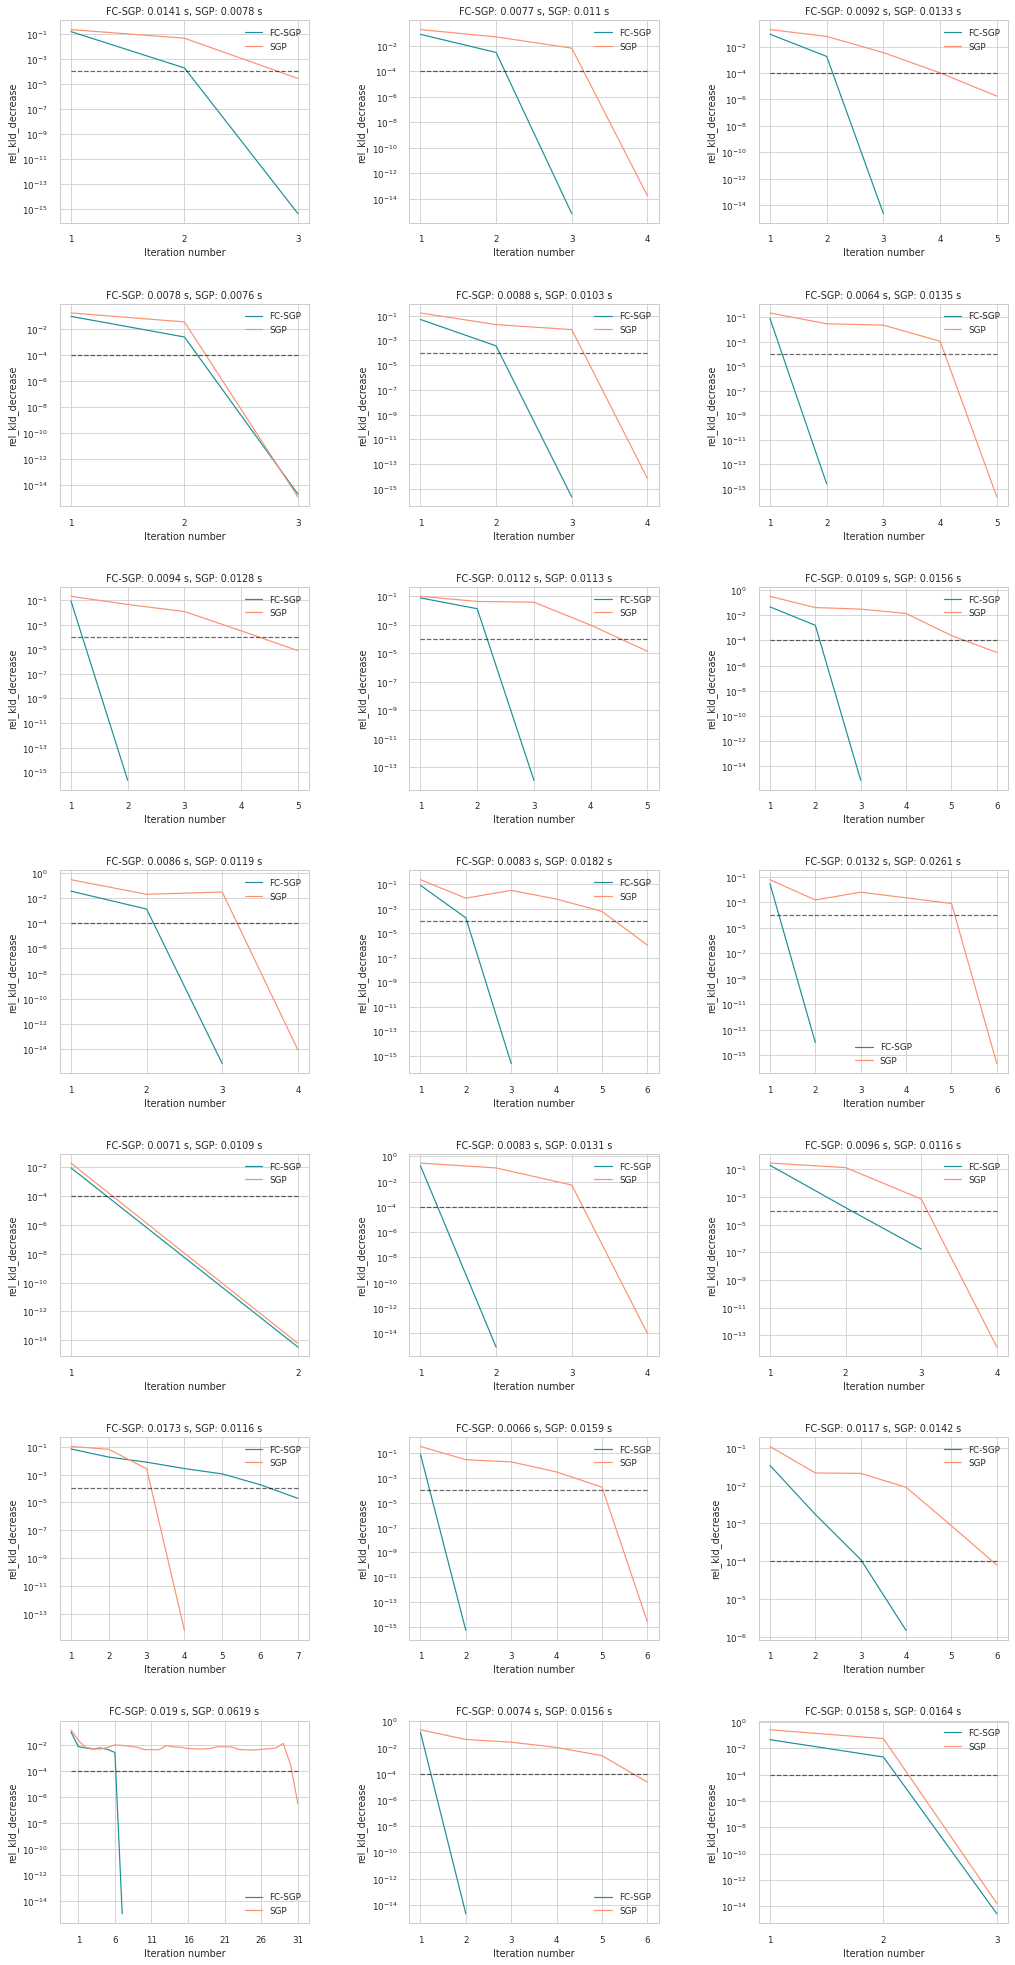

In [4]:
fig, ax = plt.subplots(7, 3, figsize=(17, 35))
for i in range(df.shape[0]//3):
    for j in range(3):
        row = df.iloc[i*3+j]
        fcsgp = np.array(ast.literal_eval(row['rel_kldsFCSGP']))
        sgp = np.array(ast.literal_eval(row['rel_kldsSGP']))

        fcsgp[fcsgp == 0.0] = np.finfo(float).eps
        sgp[sgp == 0.0] = np.finfo(float).eps

        ax[i, j].plot(fcsgp, c='#1C9099', label='FC-SGP')
        ax[i, j].plot(sgp, c='#FC9272', label='SGP')
        ax[i, j].set_yscale('log')
        ax[i, j].legend()
        ax[i, j].set_title(f'FC-SGP: {np.round(row["execution_timeFCSGP"], 4)} s, SGP: {np.round(row["execution_timeSGP"], 4)} s')
        ax[i, j].set_ylabel('rel_kld_decrease')
        ax[i, j].set_xlabel('Iteration number')

        maxLength = max(len(fcsgp), len(sgp))
        if i == 6 and j == 0:
            ax[i, j].set_xticks(
                np.arange(1, maxLength+1, 5)
            )
        else:
            ax[i, j].set_xticks(
                np.arange(maxLength), np.arange(1, maxLength+1)
            )
        ax[i, j].hlines(y=1e-4, xmin=0, xmax=maxLength-1, color='black', linestyle='--', alpha=0.6)

# plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)
plt.savefig("sgp_fcsgp_kld_compare.pdf", format="pdf", bbox_inches="tight", dpi=400)
plt.show()

In [5]:
plt.clf()
plt.close()

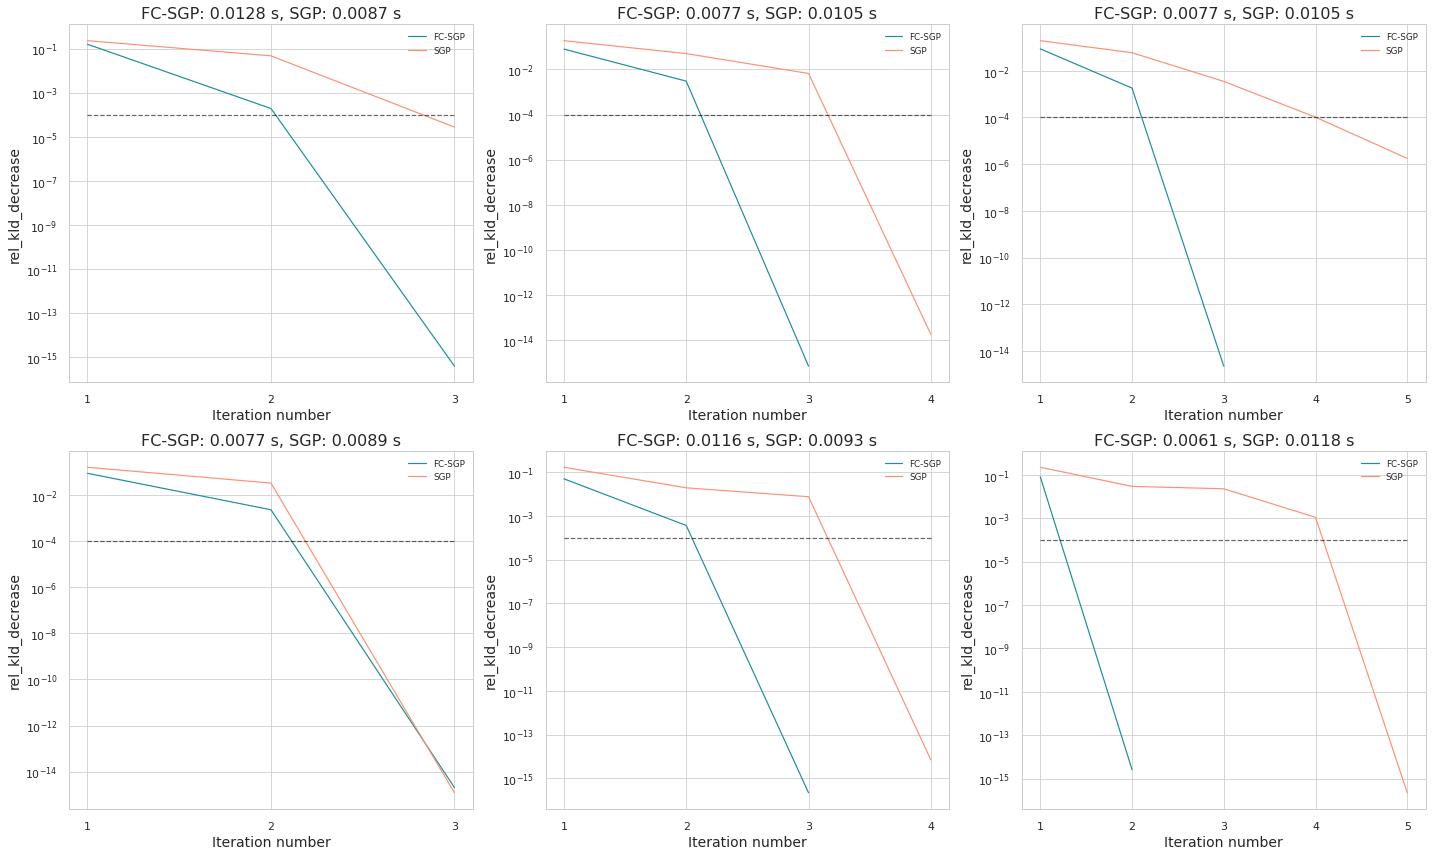

In [19]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
for i in range(2):
    for j in range(3):
        row = df.iloc[i*3+j]
        fcsgp = np.array(ast.literal_eval(row['rel_kldsFCSGP']))
        sgp = np.array(ast.literal_eval(row['rel_kldsSGP']))

        fcsgp[fcsgp == 0.0] = np.finfo(float).eps
        sgp[sgp == 0.0] = np.finfo(float).eps

        ax[i, j].plot(fcsgp, c='#1C9099', label='FC-SGP')
        ax[i, j].plot(sgp, c='#FC9272', label='SGP')
        ax[i, j].set_yscale('log')
        ax[i, j].legend()
        ax[i, j].set_title(f'FC-SGP: {np.round(row["execution_timeFCSGP"], 4)} s, SGP: {np.round(row["execution_timeSGP"], 4)} s', fontsize=16)
        ax[i, j].set_ylabel('rel_kld_decrease', fontsize=14)
        ax[i, j].set_xlabel('Iteration number', fontsize=14)

        maxLength = max(len(fcsgp), len(sgp))
        if i == 6 and j == 0:
            ax[i, j].set_xticks(
                np.arange(1, maxLength+1, 5)
            )
        else:
            ax[i, j].set_xticks(
                np.arange(maxLength), np.arange(1, maxLength+1)
            )
        ax[i, j].hlines(y=1e-4, xmin=0, xmax=maxLength-1, color='black', linestyle='--', alpha=0.6)
        ax[i, j].tick_params(axis='both', labelsize=11)

plt.tight_layout()
plt.savefig('fc_sgp_sgp_comparison.png', bbox_inches='tight', dpi=500)